# WeatherPy

Analysis is at the end in the markdown.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name   
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)    

# # Print the city count to confirm sufficient count
len(cities)


613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

In [11]:
# Get weather data
print(f"Beginning Data Retrieval")
print(f"-"*28)

data = []
count = 1
# loop through cities and make call for json on city
for city in cities:    
    # Build query URL call
    query_url = url + "appid=" + api_key + "&q=" + city +"&units=imperial"
    weather_response = requests.get(query_url)
    
    # Create conditional statement for records to add to data set.
    if (weather_response.status_code == 200):
        print(f"Processing Record " + str(count) + " | " + city)
        weather_json = weather_response.json()
        data.append(weather_json)
    else:
        print(f"City not found. Skipping...")
    time.sleep(1)
    count = count+1

print(f"-"*28)
print(f"Data Retrieval Complete")
print(f"-"*28)

Beginning Data Retrieval
----------------------------
Processing Record 1 | namatanai
Processing Record 2 | ngunguru
Processing Record 3 | ushuaia
Processing Record 4 | maryville
Processing Record 5 | lorengau
Processing Record 6 | vaini
Processing Record 7 | manjacaze
Processing Record 8 | dikson
Processing Record 9 | yar-sale
Processing Record 10 | bluff
City not found. Skipping...
City not found. Skipping...
Processing Record 13 | saskylakh
Processing Record 14 | lazaro cardenas
Processing Record 15 | monroe
City not found. Skipping...
Processing Record 17 | cape town
Processing Record 18 | leningradskiy
Processing Record 19 | bethel
Processing Record 20 | sao joao da barra
Processing Record 21 | rikitea
Processing Record 22 | smithers
Processing Record 23 | mataura
Processing Record 24 | liberty
Processing Record 25 | albany
Processing Record 26 | provideniya
Processing Record 27 | butaritari
City not found. Skipping...
Processing Record 29 | belmonte
Processing Record 30 | vostok


Processing Record 253 | iskateley
Processing Record 254 | mnogovershinnyy
Processing Record 255 | morwell
Processing Record 256 | touros
Processing Record 257 | ahipara
Processing Record 258 | orbetello
Processing Record 259 | esperance
Processing Record 260 | flinders
Processing Record 261 | waddan
Processing Record 262 | maragogi
Processing Record 263 | faanui
Processing Record 264 | alofi
Processing Record 265 | san policarpo
Processing Record 266 | thompson
Processing Record 267 | wells
Processing Record 268 | richards bay
Processing Record 269 | los llanos de aridane
Processing Record 270 | nipawin
Processing Record 271 | nyurba
Processing Record 272 | shawnee
Processing Record 273 | jacareacanga
Processing Record 274 | togul
Processing Record 275 | kieta
Processing Record 276 | santa isabel do rio negro
Processing Record 277 | marawi
City not found. Skipping...
Processing Record 279 | hobyo
Processing Record 280 | koumac
Processing Record 281 | fortuna
Processing Record 282 | lex

Processing Record 503 | chippewa falls
Processing Record 504 | maltahohe
Processing Record 505 | svarstad
Processing Record 506 | puerto escondido
Processing Record 507 | olot
Processing Record 508 | bukachacha
Processing Record 509 | shchigry
Processing Record 510 | avera
City not found. Skipping...
Processing Record 512 | mattawa
Processing Record 513 | deputatskiy
Processing Record 514 | forestville
Processing Record 515 | gobabis
Processing Record 516 | vitim
Processing Record 517 | cap malheureux
City not found. Skipping...
Processing Record 519 | mogadishu
Processing Record 520 | lakselv
Processing Record 521 | muisne
Processing Record 522 | yerofey pavlovich
Processing Record 523 | aasiaat
Processing Record 524 | tibati
Processing Record 525 | moba
Processing Record 526 | port hardy
Processing Record 527 | ushtobe
Processing Record 528 | mangrol
Processing Record 529 | gisborne
Processing Record 530 | lasa
City not found. Skipping...
Processing Record 532 | paraiso
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
from pandas.io.json import json_normalize

In [13]:
# df.to_csv(output_data_file)

result = json_normalize(data,'clouds',[["name"],['clouds', 'all'],['sys', 'country'],'dt',['main','humidity'],
                       ['coord','lat'],['coord','lon'],['main','temp_max'],['wind','speed']])

result_df= pd.DataFrame(result,columns= ["name","clouds.all", "sys.country", "dt", "main.humidity", "coord.lat", 
                                         "coord.lon", "main.temp_max", "wind.speed"])
result_df=result_df.rename(columns={"name":"City","clouds.all":"Cloudiness", "sys.country":"Country", "dt":"Date", 
                          "main.humidity":"Humidity", "coord.lat":"Lat","coord.lon":"Lng", "main.temp_max":"Max Temp",
                          "wind.speed":"Wind Speed"})
result_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Namatanai,39,PG,1574473369,65,-3.66,152.44,85.24,5.06
1,Ngunguru,0,NZ,1574473370,43,-35.62,174.5,79,8.01
2,Ushuaia,20,AR,1574473127,61,-54.81,-68.31,50,8.05
3,Maryville,90,US,1574473372,100,35.76,-83.97,55,3.83
4,Lorengau,100,PG,1574473373,77,-2.02,147.27,84.85,15.21
...,...,...,...,...,...,...,...,...,...
538,Kutum,76,SD,1574474043,25,14.2,24.66,60.08,5.55
539,Yarmouth,90,CA,1574474045,93,43.84,-66.12,43,16.11
540,Timbiqui,100,CO,1574474046,95,2.77,-77.67,73.26,2.39
541,Potiskum,100,NG,1574474047,19,11.71,11.08,77.83,8.39


In [14]:
# Output File (CSV)
output_data_file = "cities.csv"
result_df.to_csv(output_data_file)

In [15]:
cities_data = pd.read_csv("cities.csv")

cities_data.count()

Unnamed: 0    543
City          543
Cloudiness    543
Country       538
Date          543
Humidity      543
Lat           543
Lng           543
Max Temp      543
Wind Speed    543
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [86]:
temperature_df =  cities_data[["City","Lat","Max Temp"]]
temperature_df

,City,Lat,Max Temp
0,Namatanai,-3.66,85.24
1,Ngunguru,-35.62,79.00
2,Ushuaia,-54.81,50.00
3,Maryville,35.76,55.00
4,Lorengau,-2.02,84.85
...,...,...,...
538,Kutum,14.20,60.08
539,Yarmouth,43.84,43.00
540,Timbiqui,2.77,73.26
541,Potiskum,11.71,77.83


Text(0.5, 0, 'Latitude')

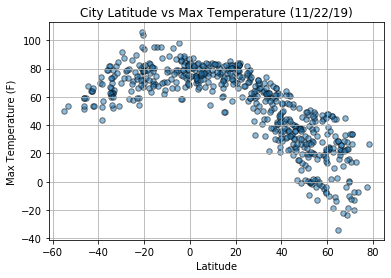

In [87]:
temp_scatter = temperature_df.plot(x="Lat",y="Max Temp", kind="scatter",title="City Latitude vs Max Temperature (11/22/19)",
                                  marker="o", edgecolors="black",alpha=0.50,s=30,grid=True)
temp_scatter.set_ylabel("Max Temperature (F)")
temp_scatter.set_xlabel("Latitude")

In [88]:
fig = temp_scatter.get_figure()
fig.savefig("temperature.png")

#### Latitude vs. Humidity Plot

In [89]:
humidity_df =  cities_data[["City","Lat","Humidity"]]
humidity_df

,City,Lat,Humidity
0,Namatanai,-3.66,65
1,Ngunguru,-35.62,43
2,Ushuaia,-54.81,61
3,Maryville,35.76,100
4,Lorengau,-2.02,77
...,...,...,...
538,Kutum,14.20,25
539,Yarmouth,43.84,93
540,Timbiqui,2.77,95
541,Potiskum,11.71,19


Text(0.5, 0, 'Latitude')

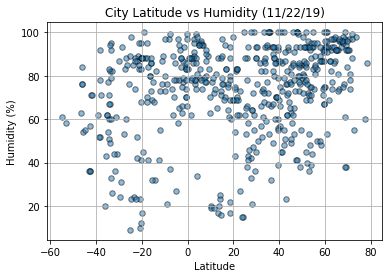

In [90]:
humidity_scatter = humidity_df.plot(x="Lat",y="Humidity", kind="scatter",title="City Latitude vs Humidity (11/22/19)",
                                  marker="o", edgecolors="black",alpha=0.50,s=30,grid=True)
humidity_scatter.set_ylabel("Humidity (%)")
humidity_scatter.set_xlabel("Latitude")

In [91]:
fig = humidity_scatter.get_figure()
fig.savefig("humidity.png")

#### Latitude vs. Cloudiness Plot

In [92]:
cloudiness_df =  cities_data[["City","Lat","Cloudiness"]]
cloudiness_df

,City,Lat,Cloudiness
0,Namatanai,-3.66,39
1,Ngunguru,-35.62,0
2,Ushuaia,-54.81,20
3,Maryville,35.76,90
4,Lorengau,-2.02,100
...,...,...,...
538,Kutum,14.20,76
539,Yarmouth,43.84,90
540,Timbiqui,2.77,100
541,Potiskum,11.71,100


Text(0.5, 0, 'Latitude')

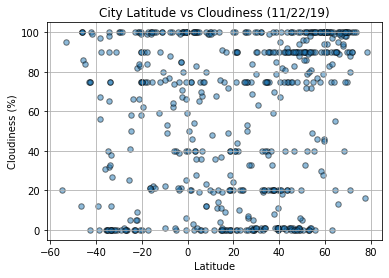

In [93]:
cloud_scatter = cloudiness_df.plot(x="Lat",y="Cloudiness", kind="scatter",title="City Latitude vs Cloudiness (11/22/19)",
                                  marker="o", edgecolors="black",alpha=0.50,s=30,grid=True)
cloud_scatter.set_ylabel("Cloudiness (%)")
cloud_scatter.set_xlabel("Latitude")

In [94]:
fig = cloud_scatter.get_figure()
fig.savefig("cloudiness.png")

#### Latitude vs. Wind Speed Plot

In [95]:
wind_df =  cities_data[["City","Lat","Wind Speed"]]
wind_df

,City,Lat,Wind Speed
0,Namatanai,-3.66,5.06
1,Ngunguru,-35.62,8.01
2,Ushuaia,-54.81,8.05
3,Maryville,35.76,3.83
4,Lorengau,-2.02,15.21
...,...,...,...
538,Kutum,14.20,5.55
539,Yarmouth,43.84,16.11
540,Timbiqui,2.77,2.39
541,Potiskum,11.71,8.39


Text(0.5, 0, 'Latitude')

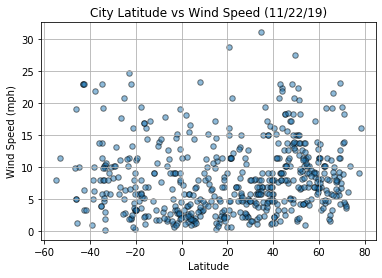

In [96]:
wind_scatter = wind_df.plot(x="Lat",y="Wind Speed", kind="scatter",title="City Latitude vs Wind Speed (11/22/19)",
                                  marker="o", edgecolors="black",alpha=0.50,s=30,grid=True)
wind_scatter.set_ylabel("Wind Speed (mph)")
wind_scatter.set_xlabel("Latitude")

In [97]:
fig = wind_scatter.get_figure()
fig.savefig("wind_speed.png")

## WeatherPy analysis

### This is for weather data on 11/22/19:
- The warmest group of tightly clustered maximum temperatures are nearest to the 0 latitude. There are some outliers that are even warmer between 0 and -20 latitude and some outliers that are cooler between 0 and 20 latitude. But, it is consistently warmer near the 0 latitude than anywhere else. 
- Wind speed seems to be faster the farther away you go from 0 latitude, even more so to the north.
- Most of the cities near the 0 latitude have high humidity. Humidity percentage starts to spread out the further you move away from 0 latitude, especially to the south. The northern regions have more of a spread, but still have more cities with humidity higher than 60%. 